In [1]:
#Step 1:

#Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import math
import glob
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import zipfile

#filter the warnings to ignore all unnecessary warnings & logs.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#using the zipfile function to call the extract fucntion.
def unzipfile(file,destfolder):
    if (os.path.isdir(destfolder)==False):
      with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall(destfolder)
        

In [3]:
#the supporting files are in the zip folder.
#so, extracting the zip files to further use these files and import them.
# extracting the zip files.

IS_LOCAL = True
if(IS_LOCAL):
    #full path
    PATH="/Users/amitr/OneDrive/Documents/AI&ML/December 2022/Recommendation Systems/Project"
else:
    PATH="../input/"
    
files=os.listdir(PATH)

for f in files:
    if f.endswith('.zip'):
        filename=f.split('.')[0]
        unzipfile(PATH+'/'+f,PATH+'/'+filename)
        
print(os.listdir(PATH))

['Data+Set', 'Data+Set.zip', 'M6W2_Popularity_CF_FoodRatings.ipynb', 'Milestone-RS.pdf', 'RS+-+Problem_Statement+%281%29.pdf', 'RS+FAQ.pdf', '_RS_Sample_Solution+1.ipynb']


In [4]:
# reading the csv files and assigning it to respective dataframes.

df1 = pd.read_csv(PATH+'/Data+Set/Data Set/phone_user_review_file_1.csv',encoding='latin')
df2 = pd.read_csv(PATH+'/Data+Set/Data Set/phone_user_review_file_2.csv',encoding='latin')
df3 = pd.read_csv(PATH+'/Data+Set/Data Set/phone_user_review_file_3.csv',encoding='latin')
df4 = pd.read_csv(PATH+'/Data+Set/Data Set/phone_user_review_file_4.csv',encoding='latin')
df5 = pd.read_csv(PATH+'/Data+Set/Data Set/phone_user_review_file_5.csv',encoding='latin')
df6 = pd.read_csv(PATH+'/Data+Set/Data Set/phone_user_review_file_6.csv',encoding='latin')

In [5]:
#displaying the contents of the dataframes.
df1.head(4)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)


In [6]:
df1.tail(4)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
374906,/cellphones/huawei-y3/,11/9/2015,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð ÑÐµÐ»Ð¾Ð¼ Ð½ÐµÐ¿Ð»Ð¾Ñ Ð¾Ð¹ Ð´ÐµÐ²Ð°Ð¹Ñ Ð±...,NaN,Huawei Y3 U03
374907,/cellphones/huawei-y3/,9/27/2015,ru,ru,Yandex,market.yandex.ru,10.0,10.0,Ð Ð¾Ð±ÑÐµÐ¼ Ð¸ ÑÐµÐ»Ð¾Ð¼ Ð°Ð¿Ð¿Ð°ÑÐ°Ñ Ð½Ð...,NaN,Huawei Y3 U03
374908,/cellphones/huawei-y3/,9/25/2015,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Ð´Ð»Ñ Ð½ÐµÑÑÐµÐ±Ð¾Ð²Ð°ÑÐµ...,NaN,Huawei Y3 U03
374909,/cellphones/huawei-y3/,9/9/2015,es,es,Portable Gear,portablegear.nl,8.0,10.0,goed toestel voor die prijs,louis van h,Huawei Y3


In [7]:
df2.head(4)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [8]:
df2.tail(4)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
114921,/cellphones/motorola-moto-g-4-plus/,8/18/2016,en,in,Amazon,amazon.in,2.0,10.0,Hopeless phone. Not at all user friendly. Woul...,Amazon Customer,"Motorola Moto G Plus, 4th Gen (White, 32 GB)"
114922,/cellphones/motorola-moto-g-4-plus/,8/18/2016,en,in,Amazon,amazon.in,10.0,10.0,Very nice phone.,Amazon Customer,"Motorola Moto G Plus, 4th Gen (White, 32 GB)"
114923,/cellphones/motorola-moto-g-4-plus/,8/18/2016,en,in,Amazon,amazon.in,8.0,10.0,Over all good phone . Give all the specificati...,Amazon Customer,"Motorola Moto G Plus, 4th Gen (White, 32 GB)"
114924,/cellphones/motorola-moto-g-4-plus/,8/18/2016,en,in,Amazon,amazon.in,6.0,10.0,I bought Moto G Plus last month.. Camera and m...,Venkidusami,"Motorola Moto G Plus, 4th Gen (White, 32 GB)"


In [9]:
print("printing the shapes of all the 6 dataframes created: ")
print(" 1st Dataframe shape: ", df1.shape)
print(" 2nd Dataframe shape: ", df2.shape)
print(" 3rd Dataframe shape: ", df3.shape)
print(" 4th Dataframe shape: ", df4.shape)
print(" 5th Dataframe shape: ", df5.shape)
print(" 6th Dataframe shape: ", df6.shape)


printing the shapes of all the 6 dataframes created: 
 1st Dataframe shape:  (374910, 11)
 2nd Dataframe shape:  (114925, 11)
 3rd Dataframe shape:  (312961, 11)
 4th Dataframe shape:  (98284, 11)
 5th Dataframe shape:  (350216, 11)
 6th Dataframe shape:  (163837, 11)


In [10]:
df6.tail(4)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
163833,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
163834,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
163835,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
163836,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


In [11]:
#Step 1A:
# merging the dataframes into one dataframe:

final_df = df1.merge(df2,how='outer').merge(df3,how='outer').merge(df4,how='outer').merge(df5,how='outer').merge(df6,how='outer')
final_df.reset_index()
print("Merged all the dataframes into one dataframe successfully")

Merged all the dataframes into one dataframe successfully


In [12]:
print("Shape of the merged single dataframe: ", final_df.shape)

Shape of the merged single dataframe:  (1414877, 11)


In [13]:
final_df.head(4)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)


In [14]:
final_df.tail(4)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1414873,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1414874,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1414875,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
1414876,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


In [15]:
#Step 1B:
# performing EDA on the merged dataset, that is explore, understand the data and share observations.

#checking for the missing values in all the columns/attributes in the dataset.

print("checking the missing values in all the columns in the dataset: ", final_df.isnull().sum())

checking the missing values in all the columns in the dataset:  phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19359
author       63202
product          1
dtype: int64


In [16]:
#Observation:
# 1. The missing values are present in total 5 columns out of 11 columns.
# 2. The product column has only 1 missing value.
# 3. There are total 63489 missing values in score and score_max columns with total records 1414877.

<Axes: >

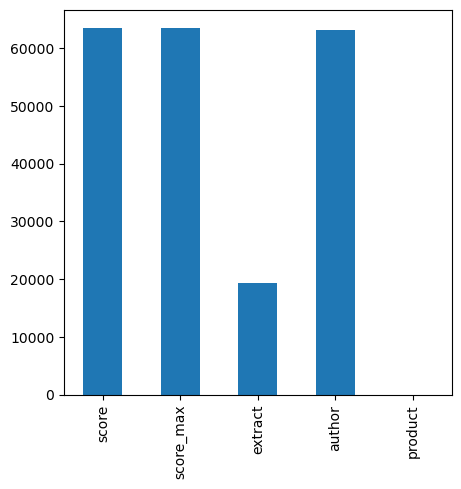

In [17]:
# plotting the missing values with the help of bar graph.

plot_width, plot_height = (5,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
final_df.isnull().sum()[final_df.isnull().sum()>0].plot(kind='bar')

In [18]:
# dropping the missing values.

final_df.dropna(inplace=True)

In [19]:
#again checking the dataframe after dropping the missing values.

final_df.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [20]:
#Observation: All the missing values are successfully dropped as the above data shows 
# there are no missing values in the dataset after the dropping of the missing values.

In [21]:
#checking the total records in the dataframe after removal of missing values.

final_df.shape

(1275663, 11)

In [22]:
#checking the datatypes of all the attributes.
final_df.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [23]:
#Observation: The columns score and score_max are of the float64 datatype.
# the other columns are of the object datatype.

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275663 entries, 0 to 1414876
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1275663 non-null  object 
 1   date       1275663 non-null  object 
 2   lang       1275663 non-null  object 
 3   country    1275663 non-null  object 
 4   source     1275663 non-null  object 
 5   domain     1275663 non-null  object 
 6   score      1275663 non-null  float64
 7   score_max  1275663 non-null  float64
 8   extract    1275663 non-null  object 
 9   author     1275663 non-null  object 
 10  product    1275663 non-null  object 
dtypes: float64(2), object(9)
memory usage: 116.8+ MB


In [25]:
final_df.describe()

,score,score_max
count,1.275663e+06,1275663.0
mean,8.008484e+00,10.0
std,2.621077e+00,0.0
min,2.000000e-01,10.0
25%,7.300000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [26]:
final_df['score'].sort_values(ascending=False).head()

0          10.0
521867     10.0
1066549    10.0
521860     10.0
521861     10.0
Name: score, dtype: float64

In [27]:
final_df['score'].unique()

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  5.2,  3.2,  4.4,  2.8,  5.6,
        3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,  5.5,
        9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,  8.7,
        6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,  5.8,
        4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,  7.1,
        8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,  2.3,
        6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

In [28]:
#Step: 1C
#rounding of scores to the nearest integers.

final_df['score'] = final_df['score'].apply(np.floor)

In [29]:
final_df['score'].unique()

array([10.,  6.,  9.,  4.,  8.,  2.,  7.,  5.,  3.,  1.,  0.])

In [30]:
#Observation: We can observe above that after rounding of to neareset integers,
# the score column is now having integer values only.

In [31]:
#Step: 1D
#checking for the missing values in the dataframe.

print("Total missing values present in the columns after droping the missing values which already done above:")
final_df.isnull().sum()

Total missing values present in the columns after droping the missing values which already done above:


phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [32]:
#Observation: There were the following missing values present in the dataset, however the steps followed
# above to remove the missing values.
# 1. The missing values which were earlier present in the dataset are in total 5 columns out of 11 columns.
# 2. The product column had previously only 1 missing value.
# 3. There were total 63489 missing values earlier in score and score_max columns with total records 1414877.

#currently, we can observe above that there are no missing values present after dropping the missing values.

In [33]:
#Step: 1E
#checking for duplicate values and removing them if any.

final_df.duplicated().any()

True

In [34]:
duplicate = final_df[final_df.duplicated()]
print("printing the duplicate rows: ", duplicate)


printing the duplicate rows:                                         phone_url        date lang country  \
342               /cellphones/samsung-galaxy-s8/   4/26/2017   nl      nl   
343               /cellphones/samsung-galaxy-s8/   4/26/2017   nl      nl   
371               /cellphones/samsung-galaxy-s8/   4/25/2017   nl      nl   
373               /cellphones/samsung-galaxy-s8/   4/25/2017   nl      nl   
3718     /cellphones/samsung-galaxy-s6-edgeplus/   10/4/2015   en      us   
...                                          ...         ...  ...     ...   
1394842                 /cellphones/nokia-6310i/    5/3/2014   ru      ru   
1394953                 /cellphones/nokia-6310i/   7/22/2011   ru      ru   
1394999                 /cellphones/nokia-6310i/  11/19/2009   ru      ru   
1397864                  /cellphones/nokia-8850/   8/23/2014   ru      ru   
1411204          /cellphones/philips-genie-2000/   8/20/2000   it      it   

           source            domain  score  s

In [35]:
final_df.shape

(1275663, 11)

In [36]:
final_df.drop_duplicates(keep=False, inplace=True)
print("Duplicates remove successfully")

Duplicates remove successfully


In [37]:
#checking for duplicates again if any.

duplicate = final_df[final_df.duplicated()]
print("printing the duplicate rows: ", duplicate)

printing the duplicate rows:  Empty DataFrame
Columns: [phone_url, date, lang, country, source, domain, score, score_max, extract, author, product]
Index: []


In [38]:
final_df.duplicated().any()

False

In [39]:
#Observation:
# 1. from the duplicate dataframe to check the duplicates, it is returing "Empty Dataframe", that is no duplicates present.
# 2. Also, checked for the duplicated data if any however it returned false.
# All the duplicated values have been successfully removed.

In [40]:
final_df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [41]:
#Step: 1F
#keeping only 1 million data samples & using random state = 612

df_sampled = final_df.sample(n=100000, random_state=612)
print("Sample of 100000 records taken")


Sample of 100000 records taken


In [42]:
df_sampled.shape

(100000, 11)

In [43]:
df_sampled.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1047690,/cellphones/samsung-brightside-u380/,10/9/2014,en,us,Amazon,amazon.com,10.0,10.0,BRAND NEW. IN THE BOX. GREAT FIND. NOT MANY AR...,JN,Samsung Verizon Samsung Brightside SCH-U380 - ...
510587,/cellphones/lenovo-vibe-k5/,7/25/2016,en,in,Amazon,amazon.in,8.0,10.0,It's okay product . Go for it,Amazon Customer,"Lenovo Vibe K5 (Silver, 16GB)"
524018,/cellphones/motorola-moto-x/,6/9/2014,es,es,Amazon,amazon.es,10.0,10.0,Hace mucho que iba detrÃ¡s de un telÃ©fono en ...,davids_yo,Motorola Moto X - Smartphone libre Android (pa...
206566,/cellphones/google-nexus-5x-h791/,11/11/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,"Love this phone! Great screen, fast, light, we...",PRL,LG Electronics Nexus 5X 5.2-inch 16 GB SIM-Fre...
944078,/cellphones/motorola-gleamplus/,1/23/2014,de,de,Amazon,amazon.de,10.0,10.0,Handy fÃ¼r Mutter geholt mit groÃen Tasten zu...,Marcel HÃ¼neke,"Lenovo Motorola Gleam+ Klapphandy (6,1 cm (2,4..."


<Axes: >

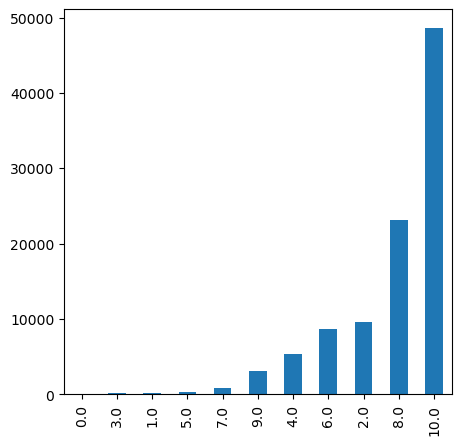

In [44]:
#visualizing the score column with the total count of the unique ratings in it.

plot_width, plot_height = (5,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
df_sampled['score'].value_counts(ascending=True).plot(kind='bar')


In [ ]:
#Observation: Here from the above plot we can observe that most of the ratings score fall in the range of 8 and 10 scores.

In [47]:
#Step: 1G
#dropping irrelevant features like phone_url and date.

df_sampled.drop(['phone_url', 'date'], axis=1,inplace=True)

In [48]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1047690 to 833078
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lang       100000 non-null  object 
 1   country    100000 non-null  object 
 2   source     100000 non-null  object 
 3   domain     100000 non-null  object 
 4   score      100000 non-null  float64
 5   score_max  100000 non-null  float64
 6   extract    100000 non-null  object 
 7   author     100000 non-null  object 
 8   product    100000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 7.6+ MB


In [49]:
df_sampled.head(4)

,lang,country,source,domain,score,score_max,extract,author,product
1047690,en,us,Amazon,amazon.com,10.0,10.0,BRAND NEW. IN THE BOX. GREAT FIND. NOT MANY AR...,JN,Samsung Verizon Samsung Brightside SCH-U380 - ...
510587,en,in,Amazon,amazon.in,8.0,10.0,It's okay product . Go for it,Amazon Customer,"Lenovo Vibe K5 (Silver, 16GB)"
524018,es,es,Amazon,amazon.es,10.0,10.0,Hace mucho que iba detrÃ¡s de un telÃ©fono en ...,davids_yo,Motorola Moto X - Smartphone libre Android (pa...
206566,en,gb,Amazon,amazon.co.uk,10.0,10.0,"Love this phone! Great screen, fast, light, we...",PRL,LG Electronics Nexus 5X 5.2-inch 16 GB SIM-Fre...


In [53]:
#Step: 2A
#Identify the most rated products.

df_sampled.groupby('product')['score'].count().sort_values(ascending=False).head()

product
Lenovo Vibe K4 Note (White,16GB)     408
Lenovo Vibe K4 Note (Black, 16GB)    340
OnePlus 3 (Graphite, 64 GB)          336
OnePlus 3 (Soft Gold, 64 GB)         276
Huawei P8lite zwart / 16 GB          213
Name: score, dtype: int64

<Axes: ylabel='product'>

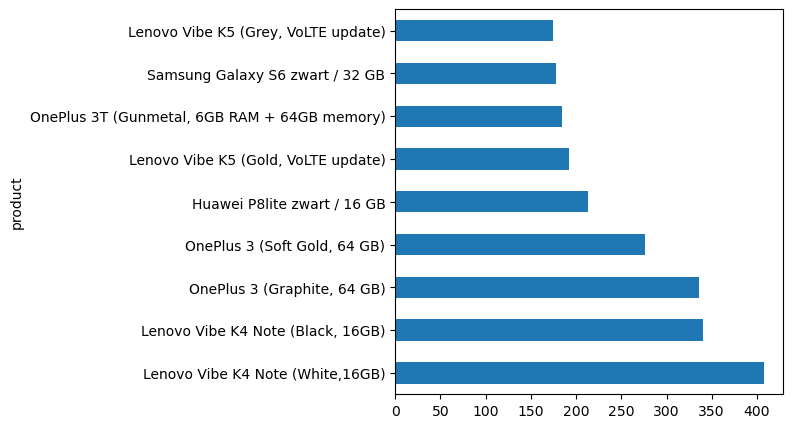

In [60]:
#visualizing the barplot the most rated products.

plot_width, plot_height = (5,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
df_sampled.groupby('product')['score'].count().sort_values(ascending=False).head(9).plot(kind='barh')

In [ ]:
#Observation: We can observe above the most rated products are "Lenovo Vibe K4 Note (White,16GB)" which is rated 408 times, 
# "Lenovo Vibe K4 Note (Black, 16GB)", "OnePlus 3 (Graphite, 64 GB)".

In [78]:
#Step: 2B
#Identify the users with most number of reviews.

df_sampled.groupby('author')['extract'].count().sort_values(ascending=False).head()

author
Amazon Customer    6100
Cliente Amazon     1500
e-bit               620
Client d'Amazon     600
Amazon Kunde        364
Name: extract, dtype: int64

<Axes: ylabel='author'>

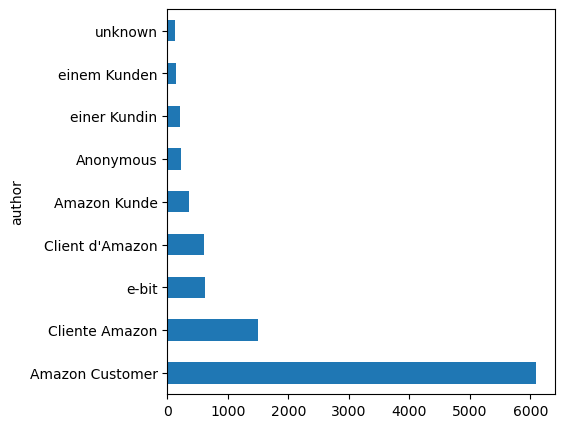

In [62]:
#visualizing the barplot the users with most number of reviews.

plot_width, plot_height = (5,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
df_sampled.groupby('author')['extract'].count().sort_values(ascending=False).head(9).plot(kind='barh')

In [66]:
#observation: we can observe above that the most number of reviews is being done by the user "Amazon Customer" 6100 times.
# then the user "Cliente Amazon" has done 1500 times reviews.

In [90]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1047690 to 833078
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lang       100000 non-null  object 
 1   country    100000 non-null  object 
 2   source     100000 non-null  object 
 3   domain     100000 non-null  object 
 4   score      100000 non-null  float64
 5   score_max  100000 non-null  float64
 6   extract    100000 non-null  object 
 7   author     100000 non-null  object 
 8   product    100000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 9.6+ MB


In [92]:
df_sampled['score'] = df_sampled['score'].astype(int)

In [93]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1047690 to 833078
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lang       100000 non-null  object 
 1   country    100000 non-null  object 
 2   source     100000 non-null  object 
 3   domain     100000 non-null  object 
 4   score      100000 non-null  int32  
 5   score_max  100000 non-null  float64
 6   extract    100000 non-null  object 
 7   author     100000 non-null  object 
 8   product    100000 non-null  object 
dtypes: float64(1), int32(1), object(7)
memory usage: 9.3+ MB


In [105]:
#Step: 2C
#selecting the data with products having more than 50 ratings and users who have given more than 50 ratings.

df_new1 = pd.DataFrame(columns=['author', 'a_count'])
df_new1['author'] = df_sampled['author'].value_counts().index.tolist()
df_new1['a_count'] = list(df_sampled['author'].value_counts() > 50) 

In [109]:
indexes = df_new1[df_new1['a_count'] == False].index
df_new1.drop(indexes, inplace=True)
df_new1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
5,Anonymous,True
6,einer Kundin,True
7,einem Kunden,True
8,unknown,True
9,Anonymous,True


In [112]:
df_new2 = pd.DataFrame(columns=['product', 'counts'])
df_new2['product'] = df_sampled['product'].value_counts().index.tolist()
df_new2['counts'] = list(df_sampled['product'].value_counts() > 50)

In [115]:
indexes = df_new2[df_new2['counts'] == False].index
df_new2.drop(indexes, inplace=True)
df_new2

,product,counts
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
126,Samsung Guru GT-E1200 (Indigo Blue),True
127,"Mi Xiaomi Mi Max Prime (Gold, 128GB)",True
128,"Sony Xperia Z1 Compact Smartphone (4,3 Zoll (1...",True
129,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...,True


In [117]:
#selecting the rows where product is having more than 50 ratings.

df_new3 = df_sampled[df_sampled['product'].isin(df_new2['product'])]
df_new3

,lang,country,source,domain,score,score_max,extract,author,product
510587,en,in,Amazon,amazon.in,8,10.0,It's okay product . Go for it,Amazon Customer,"Lenovo Vibe K5 (Silver, 16GB)"
128028,de,de,Amazon,amazon.de,6,10.0,Es ist sehr gut nur der interne speicher stimm...,Amazon Kunde,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)..."
265279,en,us,Amazon,amazon.com,10,10.0,Works perfect so far. My son is in love with t...,Stacey,Apple iPhone 6 16GB Factory Unlocked GSM 4G LT...
297930,en,in,Amazon,amazon.in,10,10.0,"Well, whoever purchases phone, they do a resea...",Harsh Sharma,"Lenovo Vibe X3 (White, 32GB)"
1015547,de,de,Dooyoo,dooyoo.de,8,10.0,Ich fand es prima und kann es nur empfehlen!,FrSchlau,HTC Desire
...,...,...,...,...,...,...,...,...,...
241909,en,in,Amazon,amazon.in,8,10.0,In this budget I can't find a phone like this....,sumit kr jha,"Samsung Galaxy J7 SM-J700F (Black, 16GB)"
75157,en,in,Amazon,amazon.in,8,10.0,Oneplus 3 is an awesome phone with great built...,Sandip gaydhankar,"OnePlus 3 (Graphite, 64 GB)"
533325,en,in,Amazon,amazon.in,10,10.0,Excellent product. No problem so far,www.flipkeys.in,"Apple iPhone 5s (Silver, 16GB)"
1098981,pt,br,MercadoLibre,opiniao.mercadolivre.com.br,10,10.0,Pode comprar sem medo.,WLADIMIRNETO,Samsung B5722


In [119]:
#next step is to select the rows from the dataframe df_new3 where users has given more than 50 ratings.

df_new4 = df_new3[df_new3['author'].isin(df_new1['author'])]
print("displaying the records having the products with more than 50 ratings & users who have given more than 50 ratings")
df_new4

displaying the records having the products with more than 50 ratings & users who have given more than 50 ratings


,lang,country,source,domain,score,score_max,extract,author,product
510587,en,in,Amazon,amazon.in,8,10.0,It's okay product . Go for it,Amazon Customer,"Lenovo Vibe K5 (Silver, 16GB)"
128028,de,de,Amazon,amazon.de,6,10.0,Es ist sehr gut nur der interne speicher stimm...,Amazon Kunde,"Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm)..."
575247,en,us,Amazon,amazon.com,2,10.0,This device could not be activated. Invalid nu...,Amazon Customer,Sprint LG Volt White (Sprint Prepaid)
503398,en,in,Amazon,amazon.in,8,10.0,Better than expected. Slightly heating problem,Amazon Customer,"Motorola Moto G Turbo (Black, 16GB)"
176949,it,it,Amazon,amazon.it,10,10.0,"Huawei P8 Lite Smartphone, Android 5.0, Proces...",Cliente Amazon,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro..."
...,...,...,...,...,...,...,...,...,...
73612,en,in,Amazon,amazon.in,6,10.0,Very good phone set.,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)"
74331,en,in,Amazon,amazon.in,10,10.0,It's really very good phone in this amount fas...,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)"
181541,it,it,Amazon,amazon.it,10,10.0,Bellissimo molto potente fantastico oooo Ã¨ un...,Cliente Amazon,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D..."
432198,en,in,Amazon,amazon.in,10,10.0,"Have had it for just a week. So far, so good -...",Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"


In [120]:
#report the shape of the final dataset.

df_new4.shape

(2827, 9)

In [122]:
#Step: 3
#build a popularity based model & recommend top 5 mobile phones.

#first calculating the mean score for a product by grouping it.

meancount_score = pd.DataFrame(df_sampled.groupby('product')['score'].mean())
meancount_score

,score
product,
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",9.500000
**** COFFRET 5 ACCESSOIRES LUMIA 510 **** Etui lumia 510 housse NOKIA LUMIA 51 coque NOKIA Lumia 510 avec rabat...,10.000000
**** COFFRET WIKO OFFICIEL **** Housse WIKO CINK FIVE Coque wiko cink five protection flip cover Etui wiko five...,6.000000
***** A&D ***** ETUI LG T 385 coque LG T385 Wifi Housse LG T385b protection pochette cuir PU LG T385 WI-fi blanc...,10.000000
03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),10.000000
...,...
×××¤×× ×¡××××¨× Xiaomi Redmi Note 3 Pro 32GB,8.333333
×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 32GB,2.000000
×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 64GB,8.571429


In [126]:
#next step to calculate the number of scores a product has got.

meancount_score['total_scores'] = pd.DataFrame(df_sampled.groupby('product')['score'].count())
meancount_score

,score,total_scores
product,,
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",9.500000,4
**** COFFRET 5 ACCESSOIRES LUMIA 510 **** Etui lumia 510 housse NOKIA LUMIA 51 coque NOKIA Lumia 510 avec rabat...,10.000000,1
**** COFFRET WIKO OFFICIEL **** Housse WIKO CINK FIVE Coque wiko cink five protection flip cover Etui wiko five...,6.000000,1
***** A&D ***** ETUI LG T 385 coque LG T385 Wifi Housse LG T385b protection pochette cuir PU LG T385 WI-fi blanc...,10.000000,1
03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),10.000000,1
...,...,...
×××¤×× ×¡××××¨× Xiaomi Redmi Note 3 Pro 32GB,8.333333,6
×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 32GB,2.000000,1
×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 64GB,8.571429,7


In [132]:
#recommending the top 5 mobile phone based on the popularity based model designed above that is
# the mobile phone with the highest mean score and highest number of ratings.

meancount_score.sort_values(by=['score', 'total_scores'],ascending=[False,False]).head()

,score,total_scores
product,,
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,21
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,20
Samsung Galaxy Note5,10.0,15
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,15
Apple iPhone 6 16GB Black,10.0,14


In [152]:
#Step: 4
#Build a collaborative filtering model using SVD.

#importing the necesssary libraries.

from sklearn import preprocessing
from collections import defaultdict

from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

#arranging the columns in the order of author, product, and ratings given(score) to be fed in the SVD.

columns_titles = ['author','product','score']

df_col_titles = final_df.reindex(columns=columns_titles)

#Limiting datapoints to 5000 samples.

df_sample2 = df_col_titles.sample(n=5000, random_state=612)

reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(df_sample2, reader=reader)

In [144]:
train_df = data.build_full_trainset()

In [145]:
train_df.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 8.0),
              (21, 2.0),
              (30, 10.0),
              (43, 2.0),
              (47, 8.0),
              (65, 2.0),
              (94, 10.0),
              (136, 10.0),
              (1, 2.0),
              (1, 6.0),
              (199, 8.0),
              (218, 2.0),
              (277, 2.0),
              (279, 4.0),
              (130, 2.0),
              (289, 10.0),
              (309, 2.0),
              (312, 10.0),
              (331, 4.0),
              (358, 6.0),
              (386, 8.0),
              (392, 10.0),
              (393, 6.0),
              (218, 10.0),
              (386, 2.0),
              (453, 8.0),
              (484, 10.0),
              (486, 4.0),
              (502, 10.0),
              (507, 8.0),
              (515, 10.0),
              (130, 4.0),
              (132, 8.0),
              (547, 10.0),
              (386, 4.0),
              (594, 8.0),
              (

In [147]:
algo = SVD()
algo.fit(train_df)

In [148]:
test_df = train_df.build_anti_testset()

In [149]:
predictions = algo.test(test_df)

In [150]:
predictions

[Prediction(uid='JN', iid='Lenovo Vibe K5 (Silver, 16GB)', r_ui=7.943, est=7.898678547135468, details={'was_impossible': False}),
 Prediction(uid='JN', iid='Motorola Moto X - Smartphone libre Android (pantalla 4.7", cÃ¡mara 10 Mp, 16 GB, Dual-Core 1.7 GHz, 2 GB RAM), blanco', r_ui=7.943, est=8.26898734501562, details={'was_impossible': False}),
 Prediction(uid='JN', iid='LG Electronics Nexus 5X 5.2-inch 16 GB SIM-Free Smartphone - Black', r_ui=7.943, est=8.169774009755981, details={'was_impossible': False}),
 Prediction(uid='JN', iid='Lenovo Motorola Gleam+ Klapphandy (6,1 cm (2,4 Zoll) TFT-Display, 2 Megapixel Kamera, USB 2.0) dunkel silber', r_ui=7.943, est=8.173354540597472, details={'was_impossible': False}),
 Prediction(uid='JN', iid='Sony Xperia P - Smartphone libre (pantalla t??ctil de 4" 540 x 960, c??mara 8 Mp, 16 GB, 2 procesadores de 1 GHz, 1 GB de RAM, S.O. Android 2.3), negro', r_ui=7.943, est=7.649132207199373, details={'was_impossible': False}),
 Prediction(uid='JN', iid

In [156]:
def get_top_npredictions(predictions, n=5):
    top_n = defaultdict(list)
    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [158]:
top_n = get_top_npredictions(predictions, n=5)

In [159]:
top_n

defaultdict(list,
            {'JN': [('Samsung Galaxy S7 edge 32GB (T-Mobile)',
               9.134619670413652),
              ('OnePlus 3 (Soft Gold, 64 GB)', 9.102184301845162),
              ('LG G3 D851 4G LTE, 32GB, (GSM Unlockedx200E;) Smartphone, Metallic Black',
               9.062234324965184),
              ('Samsung Galaxy S7 32GB (T-Mobile)', 8.995591785301254),
              ('Samsung Galaxy S7 edge 32GB (Verizon)', 8.952958310359763)],
             'Amazon Customer': [('Nokia 1661 black (UKW-Radio, Organizer, Spiele) Handy',
               9.336057994440369),
              ('Microsoft Lumia 640 UK SIM-free 5 inch Windows Smartphone - Orange',
               9.171588847268112),
              ('Motorola A1200i', 9.162265530148314),
              ('Samsung SGH-A877 Impression 3G GSM Cell Phone Black AT&T',
               9.079143715468382),
              ('Sony Xperia E Smartphone (8,9 cm (3,5 Zoll) Touchscreen, Qualcomm, 1GHz, 512MB RAM, 4GB HDD, 3,2 Megapixel Kamera, A

In [176]:
#print the recommended items for each user.

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

JN ['Samsung Galaxy S7 edge 32GB (T-Mobile)', 'OnePlus 3 (Soft Gold, 64 GB)', 'LG G3 D851 4G LTE, 32GB, (GSM Unlockedx200E;) Smartphone, Metallic Black', 'Samsung Galaxy S7 32GB (T-Mobile)', 'Samsung Galaxy S7 edge 32GB (Verizon)']
Amazon Customer ['Nokia 1661 black (UKW-Radio, Organizer, Spiele) Handy', 'Microsoft Lumia 640 UK SIM-free 5 inch Windows Smartphone - Orange', 'Motorola A1200i', 'Samsung SGH-A877 Impression 3G GSM Cell Phone Black AT&T', 'Sony Xperia E Smartphone (8,9 cm (3,5 Zoll) Touchscreen, Qualcomm, 1GHz, 512MB RAM, 4GB HDD, 3,2 Megapixel Kamera, Android 4.1) wei??']
davids_yo ['LG G3 D851 4G LTE, 32GB, (GSM Unlockedx200E;) Smartphone, Metallic Black', 'Huawei Honor 5X Unlocked Smartphone, 16GB Dark Grey (US Warranty)', 'Samsung Galaxy S7 32GB (T-Mobile)', 'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)', 'Asus ZenFone 3 Smartphone, Memoria Interna da 64 GB, Dual-SIM, Bianco [Italia]']
PRL ['OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Soft Gold, 64 GB)', 'Nokia N95', 'Son

In [181]:
#building a collaborative filtering model using KNNWithMeans from surprise using item based model.

df_sample3 = df_col_titles.sample(n=5000, random_state=612)

reader = Reader(rating_scale=(1, 10))
data_2 = Dataset.load_from_df(df_sample3,reader = reader)

train_df2, test_df2 = train_test_split(data_2, test_size=.15)

algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(train_df2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [183]:
test_pred = algo.test(test_df2)

In [185]:
test_pred

[Prediction(uid='Jozus', iid='HTC ONE X Smartphone (11,9 cm (4,7 Zoll) LCD-Touchscreen, 8 Megapixel Kamera, Android OS) wei??', r_ui=2.0, est=7.908235294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='p. iedema', iid='Apple iPhone 5s AT&T Cellphone, 16GB, Silver', r_ui=10.0, est=7.908235294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Tania', iid='LG D855 G3 Smartphone, 16 GB, Nero Metallico [Italia]', r_ui=10.0, est=7.908235294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='jazzwillie', iid='Nokia 7250i', r_ui=8.0, est=7.908235294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='mikeheel', iid='Nokia Lumia Icon', r_ui=10.0, est=7.908235294117647, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Audinator', iid='Samsung SGH-E250i

In [186]:
#printing the RMSE value
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 2.5893


2.589299281105095

In [187]:
#building a collaborative filtering model using KNNWithMeans from surprise using user based model.

df_sample3 = df_col_titles.sample(n=5000, random_state=612)

reader = Reader(rating_scale=(1, 10))
data_2 = Dataset.load_from_df(df_sample3,reader = reader)

train_df2, test_df2 = train_test_split(data_2, test_size=.15)

algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(train_df2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [190]:
# now, we will check the prediction for the user "e-bit"

uid = 'e-bit'  # raw user id
iid = 'Lenovo Vibe X3 (White, 32GB)'  

pred = algo.predict(uid, iid, verbose=True)

user: e-bit      item: Lenovo Vibe X3 (White, 32GB) r_ui = None   est = 7.97   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [ ]:
#Observation: here, from above we can observe that if the user is "e-bit" and item is "Lenovo Vibe X3 (White, 32GB)",
estimated rating is 7.97.


In [175]:
#Step 5:

#evaluate the collaborative model & print RMSE value.

print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 0.3470


0.34703604765552365

In [195]:
#Step 6:
#Predict score (average rating) for test users

#running the trained model against the testset

test_predict = algo.test(test_df2)
        
test_predict

[Prediction(uid='Mallaury R.', iid='Samsung Galaxy Note 3 Neo Smartphone dÃ©bloquÃ© 4G (Ecran : 5,5 pouces 16 Go Simple SIM Android) Blanc', r_ui=10.0, est=7.9501333333333335, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Adjeka', iid='HTC G1 Google Android Unlocked Phone with Android OS, Wi-Fi, Bluetooth, 3MP Camera, MicroSD Expansion - Unlocked Phone - US Warranty - Black', r_ui=2.0, est=2.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Kathryn Hutchison', iid='Samsung Galaxy S5 White 16GB (Virgin Mobile)', r_ui=10.0, est=7.9501333333333335, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Gabriele Favaretto', iid='Lenovo Motorola Moto E Smartphone, Display 4.3 pollici qHD, Processore Qualcomm Dual-Core 1.2GHz, Memoria 4GB, 1GB RAM, Fotocamera 5MP, Android 4.4.2 KitKat, Bluetooth, WiFi, Bianco [Spagna]', r_ui=8.0, est=8.0, details={'actual_k': 1, 'was_impossible': False

In [196]:
#evaluating the collaborative model. Print RMSE value for User Based CF
print("User-based Model : Test Set")
accuracy.rmse(test_predict, verbose=True)

User-based Model : Test Set
RMSE: 1.5039


1.5039337672453106

In [197]:
#Step 7:
#Observation: we can observe above that the RMSE value for the test set is slightly smaller as 1.5039.


In [172]:
#Step 8:
#recommending top 5 products for test users.

def get_Items_user2(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(test_df.ur[test_df.to_inner_uid(uid)])
    except ValueError: 
        return 0
    
def get_User_items2(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(test_df.ir[test_df.to_inner_iid(iid)])
    except ValueError:
        return 0
    
bf = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
bf['Iu'] = bf.uid.apply(get_Items_user)
bf['Ui'] = bf.iid.apply(get_User_items)
bf['err'] = abs(bf.est - bf.rui)
best_predictions = bf.sort_values(by='err')[:5]
worst_predictions = bf.sort_values(by='err')[-5:]

In [173]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
4350594,Mikhail,"Samsung i997 Infuse 4G, 8MP,16GB, WIFI, GPS, S...",7.943,7.943,{'was_impossible': False},1,1,1.560619e-08
6923360,Ilse72,Sony Xperia M4 Aqua,7.943,7.943,{'was_impossible': False},1,2,2.738133e-08
5621494,ummagumma2,Lenovo K900 32GB Silver UACRF 001,7.943,7.943,{'was_impossible': False},1,1,3.424382e-08
14584526,Suse Wind,Samsung Galaxy S III i9300 Smartphone 16 GB (1...,7.943,7.943,{'was_impossible': False},1,2,3.786943e-08
855233,I.S.,Apple iPhone 4 16 GB,7.943,7.943,{'was_impossible': False},1,1,4.230913e-08


In [174]:
#Step 9:
#cross validation technique for better results.

cross_validate(algo, data, measures=['RMSE'], cv=4, verbose=False)

{'test_rmse': array([2.63536921, 2.61207096, 2.72136594, 2.63319968]),
 'fit_time': (0.10937333106994629,
  0.09375596046447754,
  0.09383296966552734,
  0.07813572883605957),
 'test_time': (0.015611648559570312,
  0.01572728157043457,
  0.0,
  0.015614509582519531)}

In [ ]:
#Observation: The RMSE of SVD is lower than from the cross validation.
# RMSE value coming above as 0.347036 whereas
# from the cross validation technique the result is coming better as 2.63536, 2.61207, 2.72136 and 2.63319.


In [ ]:
#Step 10:

#Popularity based recommendation systems can be used in the following business scenarios:
# 1. The online OTT platforms where the users can be recommended the movies and other videos on the platform according
#    to the popularity ratings of those movies and videos.
# 2. Online books can be recommended to the book readers based on the popularity based systems.
# 3. The e-commerce sites can use the popularity based recommendations systems to recommend the items to the users.
# 4. The online courses can be recommended to the learners using the popularity based recommendation systems.
# 5. Netflix for example uses the popularity based recommendation systems to recommend the movies or dramas to the users.
# 6. The popular news information can be prescribed to the readers using this systems.

In [ ]:
#Step 11:
# Classification based recommendation systems can be used in the following business scenarios:
# 1. The user metadata can be collected to generate the information related to the gender, age, and purchase history 
#    of the user which further helps in recommending the user for example movies on the OTT platforms using the 
#    classification based recommendation systems.
# 2. The super markets can use the classification based recommendation systems to recommend products to the consumers.
# 3. The online books website can use this system to recommend books to the readers based on their age criteria.
# 4. The purchase history of the user on the e-commerce sites can explain the frequency of the user to buy products
#    and the money spent at a time during the purchase can be a important information to recommend the customer
#    the products with the prescribed price & quality of the products.

In [198]:
#Step 12:

#The more dynamic hybrid approaches which includes the popularity based recommendation systems as well as
# the content based recommendation systems could further improve the recommemdation for different users.
# the hybrid approach helps in nullifying the cold start problems for the new startups, e-commerce & OTT companies.
# the Hybrid approach is more useful when recommending to the users as it contains the combined logic from all the other
# available recommendation system approaches.